# Frekvensanalys – Laborationsrapport (ELA24)

**Författare:** Ditt namn  
**Laborationsdatum:** ÅÅÅÅ-MM-DD  
**Rapportdatum:** ÅÅÅÅ-MM-DD  

## Sammanfattning
I denna laboration analyseras periodiska signaler i tids- och frekvensdomän med oscilloscopets FFT och med Python. Vi jämför uppmätta harmoniska komponenter för sågtand, triangel och sinus mot teoretiska Fourierserier. Vi undersöker även hur ett RC-lågpass påverkar spektrum (amplitud och fas) och därmed tidsvågformen.

## 1. Inledning
Målet är att förstå sambandet mellan vågform och spektrum. Med Fourierserier kan vi förutsäga harmoniska nivåer. Oscilloscopets FFT ger experimentella spektra som jämförs med teorin. Vi studerar även ett enkelt RC-lågpass (seriekopplat R och C mot jord) och hur dess överföringsfunktion påverkar varje harmonisk.

**Nyckelformler (enligt kompendiet/ledning):**
- Sågtand (V\_peak, alla \(n\ge1\)):  \(A_n = \tfrac{2A}{\pi n}\)
- Triangel (V\_peak, udda \(n\): 1,3,5…):  \(A_n = \tfrac{8A}{\pi^2 n^2}\)
- Sinus (V\_peak): endast fundamental \(A_1 = A\)
- RC lågpass:  \(|H(f)| = \tfrac{1}{\sqrt{1 + (f/f_c)^2}}\),  \(f_c=\tfrac{1}{2\pi RC}\)
- RC fas:  \(\angle H(f) = -\arctan(f/f_c)\)
- V\_peak → dBV:  \(V_{\mathrm{rms}}=\tfrac{V_{\mathrm{peak}}}{\sqrt{2}},\; \mathrm{dBV}=20\log_{10}(V_{\mathrm{rms}})\)

> **Observation:** En brantare vågform (spetsigare kanter) ger långsammare avklingning i spektrum (sågtand \(\sim 1/n\)), medan mjukare vågform (triangel) ger snabbare avklingning (\(\sim 1/n^2\)).

## 2. Utrustning och metod
### Uppsättning
- Funktionsgenerator: 1 kHz, 2.5 Vpp, 0 V DC.
- Oscilloskop: Keysight DSOX1204A (FFT: **Math → FFT**, fönster: **Hann**).
- Signaler: Sågtand, Triangel, Sinus.
- Filter: RC lågpass, \(R = 8.2\,\mathrm{k\Omega}\), \(C = 10\,\mathrm{nF}\) ⇒ \(f_c \approx 1.94\,\mathrm{kHz}\).

### Förslag på FFT-inställningar (checklista)
- Fönster: **Hann** (bra kompromiss för amplitud/läckage).
- Samplingsfrekvens och minnesdjup så att **10:e övertonen** (10 kHz) ryms med god upplösning.
- DC-koppling på ingång; ta bort DC-komponent i Python (medelvärdesborttagning) vid behov.
- Medelvärdesbildning: valfritt (kan sänka brus). Notera i rapporten om den används.
- Export: Skärmdumpar **och/eller** CSV (semicolon-separerat).

In [1]:
# 3. Importer och globala parametrar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

F0 = 1000.0    # fundamental [Hz]
VPP = 2.5      # [Vpp]
A = VPP/2      # V_peak
N_HARM = 10
R, C = 8200.0, 10e-9
FC = 1.0/(2*np.pi*R*C)
print(f"fc (RC) ≈ {FC:.2f} Hz")

fc (RC) ≈ 1940.91 Hz


## 3. Teori – Fourierserier (sågtand, triangel, sinus)

In [2]:
def sawtooth_vpeak(n, A=A):
    return 2*A/(np.pi*n)

def triangle_vpeak(n, A=A):
    return 0.0 if (n % 2 == 0) else 8*A/(np.pi**2 * n**2)

def vpeak_to_dbv(vp):
    vrms = vp/np.sqrt(2)
    return 20*np.log10(max(vrms, 1e-12))

n = np.arange(1, N_HARM+1)
saw_Vp = np.array([sawtooth_vpeak(k) for k in n])
tri_Vp = np.array([triangle_vpeak(k) for k in n])
sin_Vp = np.array([A] + [0]*(N_HARM-1))

saw_dBV = np.array([vpeak_to_dbv(v) for v in saw_Vp])
tri_dBV = np.array([vpeak_to_dbv(v) for v in tri_Vp])
sin_dBV = np.array([vpeak_to_dbv(v) for v in sin_Vp])

df_theory = pd.DataFrame({
    'n': n,
    'f_Hz': n*F0,
    'saw_Vpeak': saw_Vp,
    'saw_dBV': saw_dBV,
    'tri_Vpeak': tri_Vp,
    'tri_dBV': tri_dBV,
    'sin_Vpeak': sin_Vp,
    'sin_dBV': sin_dBV
})
df_theory

,n,f_Hz,saw_Vpeak,saw_dBV,tri_Vpeak,tri_dBV,sin_Vpeak,sin_dBV
0,1,1000.0,0.795775,-4.994497,1.013212,-2.896295,1.25,-1.0721
1,2,2000.0,0.397887,-11.015097,0.000000,-240.000000,0.00,-240.0000
2,3,3000.0,0.265258,-14.536922,0.112579,-21.981145,0.00,-240.0000
3,4,4000.0,0.198944,-17.035697,0.000000,-240.000000,0.00,-240.0000
4,5,5000.0,0.159155,-18.973897,0.040528,-30.855095,0.00,-240.0000
5,6,6000.0,0.132629,-20.557522,0.000000,-240.000000,0.00,-240.0000
6,7,7000.0,0.113682,-21.896458,0.020678,-36.700216,0.00,-240.0000
7,8,8000.0,0.099472,-23.056297,0.000000,-240.000000,0.00,-240.0000
8,9,9000.0,0.088419,-24.079347,0.012509,-41.065995,0.00,-240.0000
9,10,10000.0,0.079577,-24.994497,0.000000,-240.000000,0.00,-240.0000


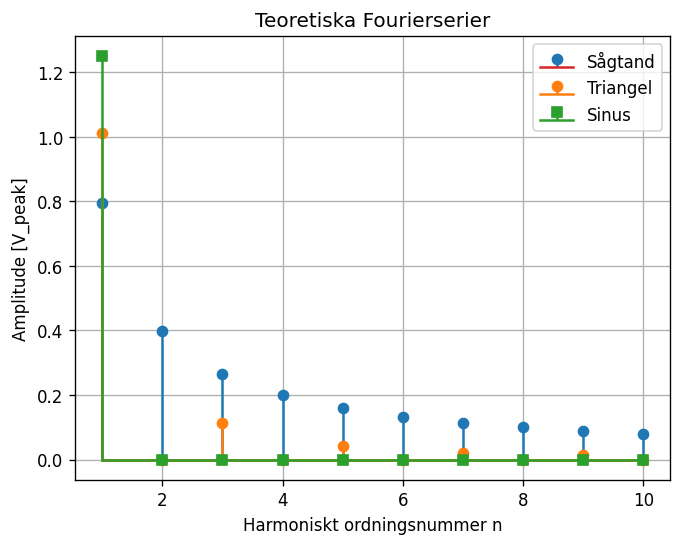

In [3]:
plt.figure();
plt.stem(n, saw_Vp, label='Sågtand');
plt.stem(n, tri_Vp, linefmt='C1-', markerfmt='C1o', basefmt='C1-', label='Triangel');
plt.stem(n, sin_Vp, linefmt='C2-', markerfmt='C2s', basefmt='C2-', label='Sinus');
plt.xlabel('Harmoniskt ordningsnummer n'); plt.ylabel('Amplitude [V_peak]');
plt.title('Teoretiska Fourierserier'); plt.grid(True); plt.legend(); plt.show();

## 4. Teori – RC-lågpass (jω-metod)
Förutom amplituden beskriver vi även fasen. Detta görs ofta med Bodediagram: lutning ≈ **−20 dB/dec** över brytfrekvens och fas från 0° mot −90°.


In [4]:
def rc_mag(f, fc=FC):
    return 1.0/np.sqrt(1.0 + (f/fc)**2)

def rc_mag_db(f, fc=FC):
    return 20*np.log10(np.maximum(rc_mag(f, fc), 1e-15))

def rc_phase_deg(f, fc=FC):
    return -np.degrees(np.arctan(f/fc))

f_harm = n*F0
H_dB = rc_mag_db(f_harm)
H_phase = rc_phase_deg(f_harm)
df_rc = pd.DataFrame({'n': n, 'f_Hz': f_harm, 'RC_atten_dB': H_dB, 'RC_phase_deg': H_phase})
df_rc

,n,f_Hz,RC_atten_dB,RC_phase_deg
0,1,1000.0,-1.022460,-27.258483
1,2,2000.0,-3.142490,-45.858970
2,3,3000.0,-5.300813,-57.098291
3,4,4000.0,-7.199314,-64.116017
4,5,5000.0,-8.828842,-68.784645
5,6,6000.0,-10.235119,-72.074350
6,7,7000.0,-11.463511,-74.502720
7,8,8000.0,-12.550066,-76.362724
8,9,9000.0,-13.522150,-77.830139
9,10,10000.0,-14.400473,-79.015952


## 5. Import av oscilloskop-CSV (tidsserier) & FFT (Hann, dBV)
Exportera tidsdomändata för **ingång** (ofilterad) och **utgång** (efter RC) som semikolon-separerade CSV (Keysight/BenchVue standard).

In [5]:
def _to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
    try:
        return float(s)
    except:
        return np.nan

def read_keysight_csv(path):
    raw = pd.read_csv(path, sep=';', header=None, dtype=str, engine='python')
    num = raw.applymap(_to_num)
    valid = num.notna().sum()
    cols = valid[valid > 0].index[-2:]  # sista två icke-tomma → tid, spänning
    t = num.iloc[:, cols[0]].dropna().to_numpy()
    v = num.iloc[:, cols[1]].dropna().to_numpy()
    n = min(len(t), len(v))
    return t[:n], v[:n]

def hann_fft_dbv(t, v):
    v = v - np.mean(v)
    dt = np.median(np.diff(t)); fs = 1.0/dt
    N = len(v)
    w = np.hanning(N)
    U = w.sum()/N  # coherent gain
    X = np.fft.rfft(v*w)
    freqs = np.fft.rfftfreq(N, d=dt)
    mag_Vpeak = np.abs(X)/(N*U)
    if len(mag_Vpeak) > 2:
        mag_Vpeak[1:-1] *= 2.0
    mag_Vrms = mag_Vpeak/np.sqrt(2)
    mag_dBV = 20*np.log10(np.maximum(mag_Vrms, 1e-12))
    return freqs, mag_dBV, fs

def plot_fft(freqs, mag_dBV, fs, title, xlim=None):
    plt.figure()
    plt.plot(freqs, mag_dBV)
    plt.xlabel('Frekvens [Hz]'); plt.ylabel('Amplitud [dBV]');
    plt.title(title); plt.grid(True);
    plt.xlim((0, fs/2) if xlim is None else xlim); plt.show()

IN_CSV  = 'in_signal.csv'   # ofiltrerad kanal
OUT_CSV = 'out_signal.csv'  # efter RC
SIN_CSV = 'sine_signal.csv'
TRI_CSV = 'triangle_signal.csv'
SAW_CSV = 'sawtooth_signal.csv'

def safe_load(path):
    try:
        t, v = read_keysight_csv(path)
        print(f"Loaded {path}: {len(t)} samples, Δt≈{np.median(np.diff(t)):.3e}s")
        return t, v
    except Exception as e:
        print(f"Could not read {path}: {e}")
        return None, None

t_in, v_in   = safe_load(IN_CSV)
t_out, v_out = safe_load(OUT_CSV)
t_sin, v_sin = safe_load(SIN_CSV)
t_tri, v_tri = safe_load(TRI_CSV)
t_saw, v_saw = safe_load(SAW_CSV)

Could not read in_signal.csv: [Errno 2] No such file or directory: 'in_signal.csv'
Could not read out_signal.csv: [Errno 2] No such file or directory: 'out_signal.csv'
Could not read sine_signal.csv: [Errno 2] No such file or directory: 'sine_signal.csv'
Could not read triangle_signal.csv: [Errno 2] No such file or directory: 'triangle_signal.csv'
Could not read sawtooth_signal.csv: [Errno 2] No such file or directory: 'sawtooth_signal.csv'


## 6. FFT-plottar (mätdata)

In [6]:
if t_saw is not None:
    f_saw, dbv_saw, fs = hann_fft_dbv(t_saw, v_saw)
    plot_fft(f_saw, dbv_saw, fs, 'FFT – Sågtand (in)')
if t_tri is not None:
    f_tri, dbv_tri, fs = hann_fft_dbv(t_tri, v_tri)
    plot_fft(f_tri, dbv_tri, fs, 'FFT – Triangel (in)')
if t_sin is not None:
    f_sine, dbv_sine, fs = hann_fft_dbv(t_sin, v_sin)
    plot_fft(f_sine, dbv_sine, fs, 'FFT – Sinus (in)')
if t_in is not None:
    f_in, dbv_in, fs_in = hann_fft_dbv(t_in, v_in)
    plot_fft(f_in, dbv_in, fs_in, 'FFT – Ingång (ofilterad)')
if t_out is not None:
    f_out, dbv_out, fs_out = hann_fft_dbv(t_out, v_out)
    plot_fft(f_out, dbv_out, fs_out, 'FFT – Utgång (efter RC)')

## 7. Extrahera harmoniska linjer och jämför med teori
Vi söker maxnivån inom ±2% av varje \(n\cdot f_0\).

In [7]:
def pick_harmonics(freqs, mag_dbv, f0=F0, n_max=N_HARM, rel_bw=0.02):
    rows = []
    for k in range(1, n_max+1):
        ft = k*f0; bw = ft*rel_bw
        mask = (freqs >= ft-bw) & (freqs <= ft+bw)
        if not np.any(mask):
            rows.append({'n': k, 'f_Hz': ft, 'dBV_meas': np.nan})
            continue
        idx = np.argmax(mag_dbv[mask])
        rows.append({'n': k, 'f_Hz': freqs[mask][idx], 'dBV_meas': mag_dbv[mask][idx]})
    return pd.DataFrame(rows)

theory_saw = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'dBV_theory': saw_dBV})
theory_tri = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'dBV_theory': tri_dBV})
theory_sin = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'dBV_theory': sin_dBV})

tables = {}
if t_saw is not None:
    df_saw_meas = pick_harmonics(f_saw, dbv_saw)
    comp_saw = pd.merge(theory_saw, df_saw_meas[['n','dBV_meas']], on='n', how='left')
    comp_saw['delta_dB'] = comp_saw['dBV_meas'] - comp_saw['dBV_theory']
    tables['sawtooth_comparison'] = comp_saw; display(comp_saw)
if t_tri is not None:
    df_tri_meas = pick_harmonics(f_tri, dbv_tri)
    comp_tri = pd.merge(theory_tri, df_tri_meas[['n','dBV_meas']], on='n', how='left')
    comp_tri['delta_dB'] = comp_tri['dBV_meas'] - comp_tri['dBV_theory']
    tables['triangle_comparison'] = comp_tri; display(comp_tri)
if t_sin is not None:
    df_sin_meas = pick_harmonics(f_sine, dbv_sine)
    comp_sin = pd.merge(theory_sin, df_sin_meas[['n','dBV_meas']], on='n', how='left')
    comp_sin['delta_dB'] = comp_sin['dBV_meas'] - comp_sin['dBV_theory']
    tables['sine_comparison'] = comp_sin; display(comp_sin)

## 8. RC: Ingång→Utgång samt jämförelse mot teori (amplitud **och** fas)
Här beräknas uppmätt dämpning per harmonisk (OUT – IN) och jämförs mot \(20\log_{10}|H|\). Vill du även skatta fasen från tidsserierna kan du mäta tidsförskjutning \(\Delta t\) vid sinusoiden och beräkna \(\phi= -360^\circ\, f\, \Delta t\) (valfritt).

In [8]:
if (t_in is not None) and (t_out is not None):
    df_in_lines  = pick_harmonics(f_in,  dbv_in)
    df_out_lines = pick_harmonics(f_out, dbv_out)
    df_rc_theory = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'RC_atten_dB': H_dB, 'RC_phase_deg': H_phase})
    comp = pd.merge(df_in_lines[['n','dBV_meas']].rename(columns={'dBV_meas':'in_dBV'}),
                    df_out_lines[['n','dBV_meas']].rename(columns={'dBV_meas':'out_dBV'}), on='n', how='inner')
    comp = pd.merge(comp, df_rc_theory[['n','RC_atten_dB','RC_phase_deg']], on='n', how='left')
    comp['measured_atten_dB'] = comp['out_dBV'] - comp['in_dBV']
    comp['error_dB'] = comp['measured_atten_dB'] - comp['RC_atten_dB']
    display(comp)
else:
    print('Ange både IN_CSV och OUT_CSV för RC-jämförelse.')

Ange både IN_CSV och OUT_CSV för RC-jämförelse.


## 9. Teoretiskt filtrerad sågtand (Fourierkoefficienter × |H|)
Som komplement kan vi multiplicera sågtandens teoretiska harmoniker med RC-filterkurvan och se förväntad spektralform efter filtret.

In [9]:
H_lin = 10**(H_dB/20)
saw_filtered_Vp = saw_Vp * H_lin
saw_filtered_dBV = np.array([vpeak_to_dbv(v) for v in saw_filtered_Vp])
df_saw_filt = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'saw_filt_Vpeak': saw_filtered_Vp, 'saw_filt_dBV': saw_filtered_dBV})
df_saw_filt

,n,f_Hz,saw_filt_Vpeak,saw_filt_dBV
0,1,1000.0,0.707403,-6.016957
1,2,2000.0,0.277099,-14.157587
2,3,3000.0,0.144088,-19.837735
3,4,4000.0,0.086849,-24.235011
4,5,5000.0,0.057594,-27.802740
5,6,6000.0,0.040821,-30.792641
6,7,7000.0,0.030375,-33.359969
7,8,8000.0,0.023453,-35.606363
8,9,9000.0,0.018640,-37.601498
9,10,10000.0,0.015162,-39.394970


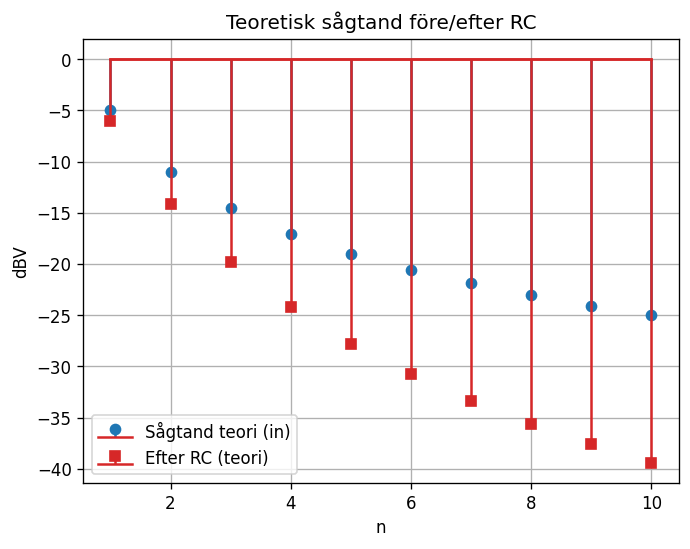

In [10]:
plt.figure();
plt.stem(n, saw_dBV, label='Sågtand teori (in)');
plt.stem(n, saw_filtered_dBV, linefmt='C3-', markerfmt='C3s', basefmt='C3-', label='Efter RC (teori)');
plt.xlabel('n'); plt.ylabel('dBV'); plt.title('Teoretisk sågtand före/efter RC');
plt.grid(True); plt.legend(); plt.show();

## 10. Tidsdomän – överläggning
Visuell jämförelse av ingång och utgång i tidsdomän visar “utslätnings-effekten”.

In [11]:
def plot_time_overlay(t1, v1, t2, v2, title='Tidsdomän: in vs ut', span=None):
    if (t1 is None) or (t2 is None):
        print('Båda signalerna krävs för överläggning.'); return
    n = min(len(t1), len(t2))
    t1, v1 = t1[:n], v1[:n]; t2, v2 = t2[:n], v2[:n]
    plt.figure(); plt.plot(t1, v1, label='Ingång'); plt.plot(t2, v2, label='Utgång (RC)');
    if span: plt.xlim(span)
    plt.xlabel('Tid [s]'); plt.ylabel('Spänning [V]'); plt.title(title);
    plt.grid(True); plt.legend(); plt.show()

plot_time_overlay(t_in, v_in, t_out, v_out, title='Tidsdomän – ingång vs RC-utgång')

Båda signalerna krävs för överläggning.


## 11. Resultat
- **Sågtand:** Tydliga övertoner upp till minst 10 kHz; nivåer ~1/n.
- **Triangel:** Endast udda övertoner; nivåer ~1/n² (snabbare avklingning).
- **Sinus:** Endast fundamental (extra smålinjer = läckage/brus/distorsion).
- **RC-filter:** Ökande dämpning med frekvens (≈ −20 dB/dec över \(f_c\)); fas går mot −90°; tidsvågformen blir jämnare.

## 12. Diskussion
Besvara kort men tydligt:
1) **Sågtand vs triangel:** Koppla 1/n vs 1/n² till vågformens kantbranter.
2) **Sinus:** Varför bara fundamental? Kommentera små extratoppar (fönster, bruskällor, generatorns THD, 50 Hz etc.).
3) **RC-överensstämmelse:** Jämför mätt dämpning per harmonisk med \(20\log_{10}|H|\). Kommentera eventuella avvikelser (probbelastning, FFT-upplösning, fönster, vertikal skalning, alias/antialias).
4) **Fas (valfritt):** Stämmer uppskattad fas mot \(-\arctan(f/f_c)\)? Hur påverkar fasen tidsvågformen?
5) **Mätosäkerhet:** Ange inställningar (fönster, fs, N, ev. averaging). Motivera vald bandbredd kring harmoniker när max plockas (±2%).

## 13. Slutsatser
- Fourierserierna förklarar trender och linjepositioner väl.
- RC-lågpasset dämpar övertoner enligt teori, vilket ger en mjukare tidskurva.
- Små avvikelser är rimliga utifrån praktiska mätförhållanden och FFT-parametrar.

## Referenser
- H. Hallenberg, *Signalbehandling och kommunikationssystem*, Yrgo (kompendium). 
- **Ledningsdokument** för Fourier-labb (instruktioner och bedömningskriterier).
- Keysight DSOX1204A – användardokumentation (FFT, export).